In [1]:
import numpy as np
from sklearn.cluster import KMeans

def clara(X, k, num_samplings=100):
    m = X.shape[0]
    n = X.shape[1]
    best_cost = np.inf
    best_cluster_centers = None
    for i in range(num_samplings):
        sample_indices = np.random.choice(m, size=int(0.1 * m), replace=False)
        sample = X[sample_indices]
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(sample)
        cost = kmeans.inertia_
        if cost < best_cost:
            best_cost = cost
            best_cluster_centers = kmeans.cluster_centers_
    kmeans = KMeans(n_clusters=k, init=best_cluster_centers)
    kmeans.fit(X)
    return kmeans

In [2]:
#Importing the necessary libraries
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

# Calculating Cumulative Count Cut
def scaleCCC(x):
    return((x - np.nanpercentile(x, 2))/(np.nanpercentile(x, 98) - np.nanpercentile(x,2)))

def applyCCC(images_list):
  images_open = []

  # Opening the satellite images
  for img_name in images_list:
    img_open = gdal.Open('./ALL_FLOOD/' + img_name)
    # Extracting individual bands(4,8,12) from the uploaded images
    band4 = img_open.GetRasterBand(1).ReadAsArray()
    band8 = img_open.GetRasterBand(2).ReadAsArray()
    band12 = img_open.GetRasterBand(3).ReadAsArray()
    ccc4 = scaleCCC(band4)
    ccc8 = scaleCCC(band8)
    ccc12 = scaleCCC(band12)
    # Creating a new images by combining the three bands 
    images_open.append(np.dstack((ccc4,ccc8,ccc12)))  

  return images_open

images_list=["2_A.tif","2_P.tif","3_A.tif","3_P.tif"]
all_images_array = applyCCC(images_list)
reshaped_images=[]
for i in range(len(all_images_array)):
  new_shape = (all_images_array[i].shape[0] * all_images_array[i].shape[1], all_images_array[i].shape[2])
  new_image = all_images_array[i][:, :, :3].reshape(new_shape)
  reshaped_images.append(new_image)

#concatenating all the arrays
combined_image = reshaped_images[0]
for i in range(1, len(reshaped_images)):
  combined_image = np.concatenate((combined_image, reshaped_images[i]), axis=0)

# Removing nan values
combined_image2 = np.nan_to_num(combined_image)

X_before = combined_image2
print(X_before)

# Running optics Algorithm on train image
trained_optics= clara(X_before,3)
#X_cluster_before = trained_optics.labels_


[[0.10751748 0.60512364 0.26451078]
 [0.11013986 0.58789754 0.27750137]
 [0.10460373 0.5737632  0.27750137]
 ...
 [0.9525483  0.7845118  1.1871092 ]
 [0.9982425  0.7838384  1.1871092 ]
 [0.9209139  0.74208754 1.2058681 ]]


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

# Testing

In [3]:
#Importing the necessary libraries

from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

#  calculating Cumulative Count Cut 

def scaleCCC(x):
    return((x - np.nanpercentile(x, 2))/(np.nanpercentile(x, 98) - np.nanpercentile(x,2)))

# Opening the satellite images

img = gdal.Open("./ALL_FLOOD/1_P.tif")

# Extracting individual bands(4,8,12) from the uploaded images

band4_before = img.GetRasterBand(1).ReadAsArray()
band8_before = img.GetRasterBand(2).ReadAsArray()
band12_before = img.GetRasterBand(3).ReadAsArray()

ds_before = None

ccc4_before = scaleCCC(band4_before)
ccc8_before = scaleCCC(band8_before)
ccc12_before = scaleCCC(band12_before)

# Creating a new images by combining the three bands
 
before_img = np.dstack((ccc4_before,ccc8_before,ccc12_before))

In [4]:
new_before_shape = (before_img.shape[0] * before_img.shape[1], before_img.shape[2])
X_before = before_img[:, :, :3].reshape(new_before_shape)

In [5]:
test_clara_before = trained_optics.predict(X_before)
X_cluster_before = test_clara_before
X_cluster_before = X_cluster_before.reshape(before_img[:, :, 0].shape)

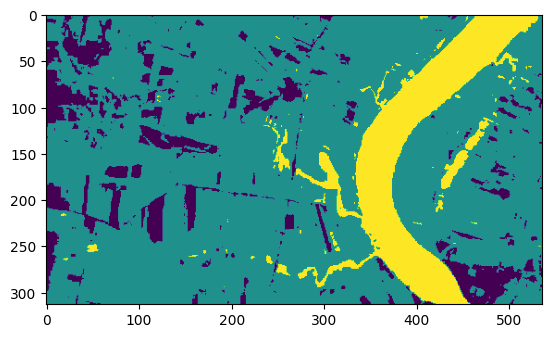

In [6]:
import matplotlib.patches as mpatches
import matplotlib.colors as colo

# Visualizing the clusters formed for pre-flood image

plt.figure()
im_before = plt.imshow(X_cluster_before)
plt.show()

In [9]:
arr_before = np.unique(X_cluster_before, return_counts=True)
key_before, val_before = arr_before
water_before = val_before[2]/(val_before[1] + val_before[2] + val_before[0]) * 100
#yet to find exact indice for water 
print("%.2f" %water_before, "%")

12.41 %
